# Northwind Traders Analysis Using SQL

## Introduction

In this project, I am stepping into the role of a Data Analyst at Northwind Traders, a global distributor of gourmet foods. The management team has tasked me with providing valuable insights to support strategic decision-making across various areas of the business. This project will specifically focus on four key aspects:
* Evaluating employee performance to boost productivity
* Understanding product sales and category performance to optimize inventory and marketing strategies
* Analyzing sales growth to identify trends, monitor company progress, and make more accurate forecasts
* And evaluating customer purchase behavior to target high-value customers with promotional incentives

Northwind database has over a dozen tables. Below is a modified schema diagram of the tables we need for our analysis.

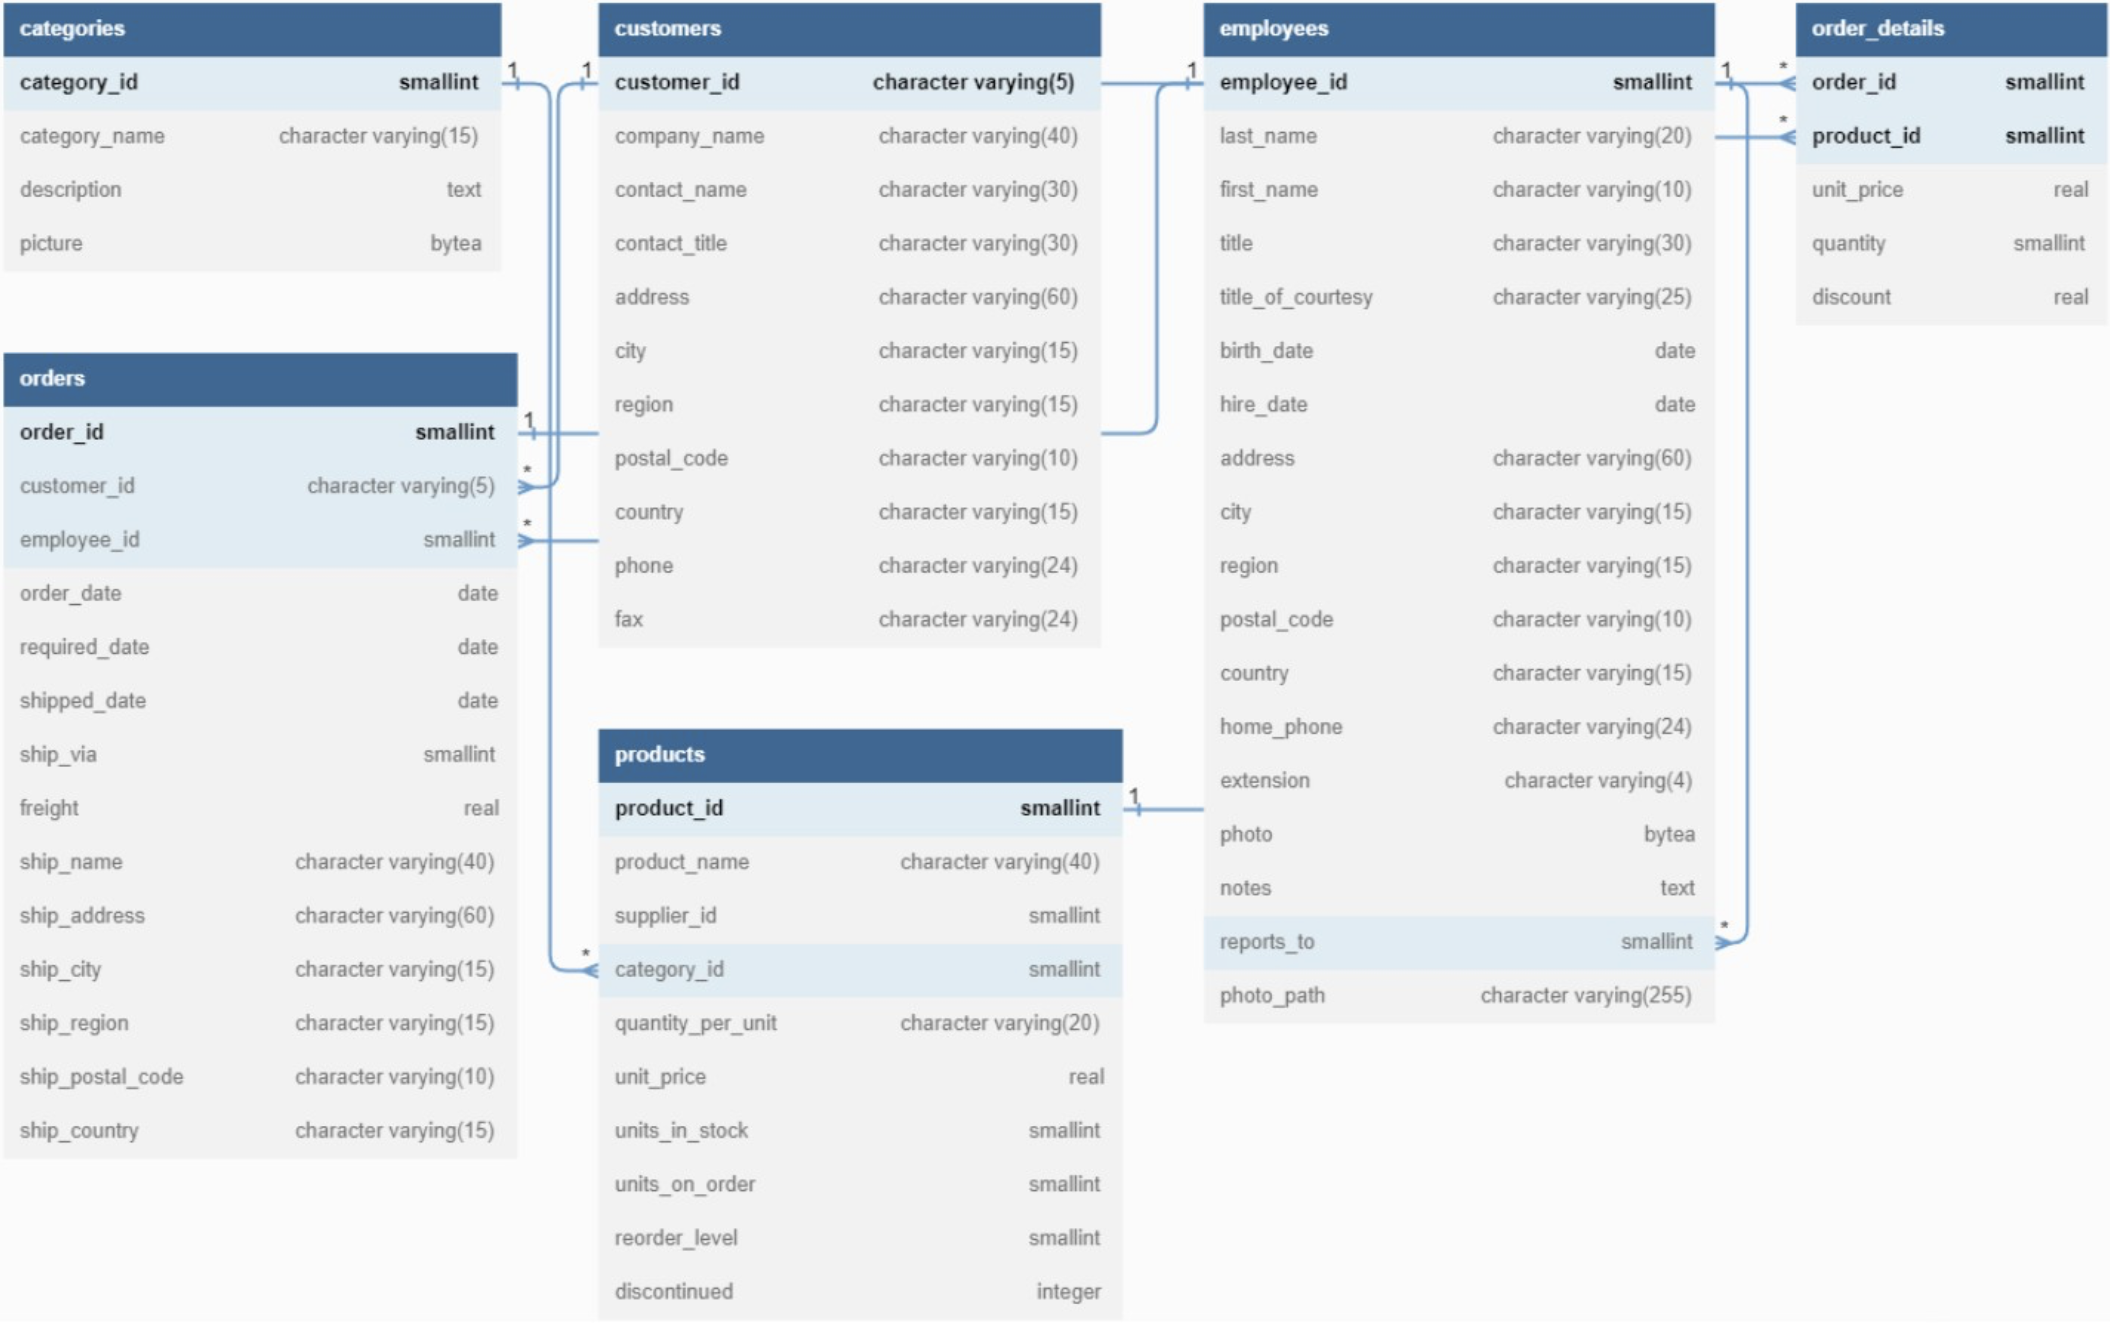

Let's go ahead and load in our database.

In [1]:
# Loading in sql
%load_ext sql

# Connecting to northwind db
%sql postgresql://postgres@localhost:5432/northwind

## Exploring the Northwind Database - Getting to Know the Data

In [2]:
%%sql 
-- View database tables

SELECT table_name AS name,
       table_type AS type
  FROM information_schema.tables
 WHERE table_schema = 'public' AND table_type = 'BASE TABLE';

 * postgresql://postgres@localhost:5432/northwind
14 rows affected.


name,type
region,BASE TABLE
products,BASE TABLE
employees,BASE TABLE
categories,BASE TABLE
employee_territories,BASE TABLE
customer_demographics,BASE TABLE
customer_customer_demo,BASE TABLE
territories,BASE TABLE
us_states,BASE TABLE
suppliers,BASE TABLE


Let's looking at some tables in depth.

In [3]:
%%sql
-- customers, all columns

SELECT *
  FROM customers
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [4]:
%%sql 
-- orders, all columns

SELECT *
  FROM orders
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [5]:
%%sql
-- products, all columns

SELECT *
  FROM products
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1
2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,1
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [6]:
%%sql
-- order_details, all columns

SELECT *
  FROM order_details
 LIMIT 10;

 * postgresql://postgres@localhost:5432/northwind
10 rows affected.


order_id,product_id,unit_price,quantity,discount
10248,11,14.0,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0
10249,14,18.6,9,0.0
10249,51,42.4,40,0.0
10250,41,7.7,10,0.0
10250,51,42.4,35,0.15
10250,65,16.8,15,0.15
10251,22,16.8,6,0.05
10251,57,15.6,15,0.05


In [7]:
%%sql
-- employees, few columns

SELECT employee_id, last_name, first_name, reports_to
  FROM employees
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


employee_id,last_name,first_name,reports_to
1,Davolio,Nancy,2
2,Fuller,Andrew,None
3,Leverling,Janet,2
4,Peacock,Margaret,2
5,Buchanan,Steven,2


## Creating Views

I'm going to combine some tables and save them as views to help me later in the project.

In [8]:
%%sql
-- Combining 'customers' and 'orders' tables on customer_id
  
  DROP VIEW customers_orders;

CREATE VIEW customers_orders AS
SELECT o.order_id, c.customer_id, c.contact_name, o.order_date
  FROM customers c
  JOIN orders o 
    ON c.customer_id = o.customer_id;

SELECT *
  FROM customers_orders
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
Done.
Done.
5 rows affected.


order_id,customer_id,contact_name,order_date
10248,VINET,Paul Henriot,1996-07-04
10249,TOMSP,Karin Josephs,1996-07-05
10250,HANAR,Mario Pontes,1996-07-08
10251,VICTE,Mary Saveley,1996-07-08
10252,SUPRD,Pascale Cartrain,1996-07-09


In [9]:
%%sql
-- Combining 'products', 'orders', and 'order_details' tables on product_id and order_id

  DROP VIEW product_order_details;

CREATE VIEW product_order_details AS
SELECT o.order_id, o.order_date, p.product_id, p.category_id, 
       p.product_name, od.unit_price, od.quantity, od.discount
  FROM products p
  JOIN order_details od
    ON p.product_id = od.product_id
  JOIN orders o
    ON o.order_id = od.order_id;
    
SELECT *
  FROM product_order_details
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
Done.
Done.
5 rows affected.


order_id,order_date,product_id,category_id,product_name,unit_price,quantity,discount
10248,1996-07-04,11,4,Queso Cabrales,14.0,12,0.0
10248,1996-07-04,42,5,Singaporean Hokkien Fried Mee,9.8,10,0.0
10248,1996-07-04,72,4,Mozzarella di Giovanni,34.8,5,0.0
10249,1996-07-05,14,7,Tofu,18.6,9,0.0
10249,1996-07-05,51,7,Manjimup Dried Apples,42.4,40,0.0


In [10]:
%%sql
-- Combining 'employees' and 'orders' tables on employee_id

  DROP VIEW employees_orders;

CREATE VIEW employees_orders AS
SELECT e.employee_id,
       e.first_name || ' ' || e.last_name AS employee_name,
       o.order_id, o.order_date
  FROM employees e
  JOIN orders o 
    ON e.employee_id = o.employee_id;

SELECT *
  FROM employees_orders
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
Done.
Done.
5 rows affected.


employee_id,employee_name,order_id,order_date
5,Steven Buchanan,10248,1996-07-04
6,Michael Suyama,10249,1996-07-05
4,Margaret Peacock,10250,1996-07-08
3,Janet Leverling,10251,1996-07-08
4,Margaret Peacock,10252,1996-07-09


## Ranking Employee Sales Performance

I'm going to look at the company's sales performance from an employee perspective. The objective is twofold:
* First, the management team wants to recognize and reward top-performing employees, fostering a culture of excellence within the organization.
* Second, they want to identify employees who might be struggling so that they can offer the necessary training or resources to help them improve.

The management team is keen on encouraging healthy competition and rewarding stellar performers. I'm going to rank employees based on their total sales amount.

In [11]:
%%sql
/* Using 'employees_orders' view and combining it with 'order_details' table 
and ranking total_sales as sales_rank */

WITH
   employee_sales AS (
   
   SELECT eo.employee_id,
          eo.employee_name, 
          ROUND(SUM(od.unit_price * od.quantity * (1 - od.discount))::numeric, 2) AS total_sales
     FROM employees_orders eo
     JOIN order_details od
       ON eo.order_id = od.order_id
    GROUP BY eo.employee_id, eo.employee_name
   )
    
   SELECT *, RANK() OVER(ORDER BY total_sales DESC) AS sales_rank
     FROM employee_sales;

 * postgresql://postgres@localhost:5432/northwind
9 rows affected.


employee_id,employee_name,total_sales,sales_rank
4,Margaret Peacock,232890.85,1
3,Janet Leverling,202812.84,2
1,Nancy Davolio,192107.60,3
2,Andrew Fuller,166537.76,4
8,Laura Callahan,126862.28,5
7,Robert King,124568.23,6
9,Anne Dodsworth,77308.07,7
6,Michael Suyama,73913.13,8
5,Steven Buchanan,68792.28,9


We can see that Margeret Peacock is the top-selling employee and Steven Buchanan is the lowest-selling employee.

## Running Total of Monthly Sales

Management wants to visualize the progress of the sales and identify trends that might shape the company's future strategies. I'm going to calculate the running total of sales by month. This visual will provide the management team with a clear depiction of sales trends and help identify periods of high or low sales activity.

In [12]:
%%sql
/* Creating a CTE that calculates 'sales_total' per month using 'product_order_details' view, 
then using the CTE to calculate running total by month */

WITH monthly_sales AS (
   
    SELECT DATE_TRUNC('month', order_date) AS month,
           ROUND(SUM(quantity * unit_price * (1 - discount))::numeric, 2) AS sales_total
      FROM product_order_details
     GROUP BY DATE_TRUNC('month', order_date)
)

SELECT month, SUM(sales_total) OVER(ORDER BY month) AS running_total
  FROM monthly_sales
 ORDER BY month;

 * postgresql://postgres@localhost:5432/northwind
23 rows affected.


month,running_total
1996-07-01 00:00:00-10:00,27861.90
1996-08-01 00:00:00-10:00,53347.18
1996-09-01 00:00:00-10:00,79728.58
1996-10-01 00:00:00-10:00,117244.30
1996-11-01 00:00:00-10:00,162844.35
1996-12-01 00:00:00-10:00,208083.98
1997-01-01 00:00:00-10:00,269342.05
1997-02-01 00:00:00-10:00,307825.68
1997-03-01 00:00:00-10:00,346372.90
1997-04-01 00:00:00-10:00,399405.85


## Calculate The Month-Over-Month Sales Growth Rate

Next the management team wants to understand the rate at which sales are increasing or decreasing from month to month to identify significant trends. This will provide a clear picture of the periods of growth or contraction for informing business strategy and decision-making.

In [13]:
%%sql
/* Creating a CTE for 'monthly_sales' from 'product_order_datails' view, 
calculating previous month sales from 'monthly_sales' CTE, then finally
calculating growth rate. */

WITH monthly_sales AS (
    
    SELECT DATE_TRUNC('month', order_date)::DATE AS month,
           ROUND(SUM(quantity * unit_price * (1 - discount))::numeric, 2) AS month_sales
      FROM product_order_details
     GROUP BY DATE_TRUNC('month', order_date)
),

prev_month_sales AS (
    SELECT month, month_sales,
           LAG(month_sales) OVER(ORDER BY month) AS previous_month_sales
      FROM monthly_sales
     ORDER BY month
)

SELECT month, month_sales, previous_month_sales,
       ROUND((month_sales - previous_month_sales) / previous_month_sales * 100.0, 2) AS growth_rate
  FROM prev_month_sales
 ORDER BY month;

 * postgresql://postgres@localhost:5432/northwind
23 rows affected.


month,month_sales,previous_month_sales,growth_rate
1996-07-01,27861.90,None,None
1996-08-01,25485.28,27861.90,-8.53
1996-09-01,26381.40,25485.28,3.52
1996-10-01,37515.72,26381.40,42.21
1996-11-01,45600.05,37515.72,21.55
1996-12-01,45239.63,45600.05,-0.79
1997-01-01,61258.07,45239.63,35.41
1997-02-01,38483.63,61258.07,-37.18
1997-03-01,38547.22,38483.63,0.17
1997-04-01,53032.95,38547.22,37.58


## Identifying High-Value Customers

Let's take a look at another important aspect of the business, the customers. Management wants to identify high-value customers to whom they can offer targeted promotions and special offers, which could drive increased sales, improve customer retention, and attract new customers. Let's see which customers identify with above-average order values. 

In [14]:
%%sql
/* Created two CTEs to calculate whether a customers order is above or below average. 
Then in the main query, counted how many orders are over average per customer. */

WITH
    customer_order_total AS (
       
        SELECT co.customer_id, od.order_id, 
              SUM(od.quantity * od.unit_price * (1- od.discount)) AS order_total
         FROM customers_orders co
         JOIN order_details od
           ON co.order_id = od.order_id
        GROUP BY od.order_id, co.customer_id
),
    
    value_category_table AS ( 
       
        SELECT customer_id, order_id, order_total,
              CASE
              WHEN order_total > AVG(order_total) OVER() THEN 'Above Average'
              ELSE 'Below Average'
              END AS value_category
         FROM customer_order_total
)

SELECT customer_id, COUNT(*) AS no_of_above_avg_orders
  FROM value_category_table
 WHERE value_category = 'Above Average'
 GROUP BY customer_id
 ORDER BY no_of_above_avg_orders DESC
 LIMIT 10;

 * postgresql://postgres@localhost:5432/northwind
10 rows affected.


customer_id,no_of_above_avg_orders
SAVEA,26
ERNSH,26
QUICK,22
HUNGO,11
RATTC,10
BONAP,8
FOLKO,8
RICSU,7
HILAA,7
FRANK,7


The top 3 customers with the most above average order totals are `SAVEA`, `ERNSH`, and `QUICK`.

## Percentage of Sales for Each Category

THe management team wants an understanding of sales composition across different product categories. By knowing the percentage of total sales for each product category, we'll be able to see which categories drive most of the company's sales. This understanding will help guide decisions about inventory like, which categories should be stocked more heavily, and marketing strategies like, which categories should be promoted more aggressively.

In [15]:
%%sql
/* Created a CTE using 'product_order_details' view and joining 'categories' table
to calculate total sales per category. The main query finds each category's sales percentage
in relation to total sales of all the cateregories. */

WITH category_sales_table AS (
    
    SELECT c.category_id, c.category_name,
           ROUND(SUM(po.quantity * po.unit_price * (1 - po.discount))::numeric, 2) AS category_sales
      FROM product_order_details po
      JOIN categories c
        ON po.category_id = c.category_id
     GROUP BY c.category_id
)

SELECT category_id, category_name, 
       ROUND(category_sales / SUM(category_sales) OVER() * 100.0, 2) AS sales_percentage
  FROM category_sales_table
 ORDER BY sales_percentage DESC;

 * postgresql://postgres@localhost:5432/northwind
8 rows affected.


category_id,category_name,sales_percentage
1,Beverages,21.16
4,Dairy Products,18.53
3,Confections,13.22
6,Meat/Poultry,12.88
8,Seafood,10.37
2,Condiments,8.38
7,Produce,7.90
5,Grains/Cereals,7.56


The top 3 categories with the highest sales percentages are `Beverages`, `Dairy Products`, and `Confections`.

## Top Products Per Category

The management team wants to know the top three items sold in each product category. This will allow them to identify star performers and ensure that these products are kept in stock and marketed prominently.

In [16]:
%%sql
/* Created a CTE using 'product_order_details' view and joining 'categories' table 
to calculate each products total sales. Then using that CTE in the next CTE to 
create a sales rank column. In the main query it filters for the top three sales */

WITH product_sales_table AS (
    
    SELECT po.product_id, c.category_name,
           ROUND(SUM(po.quantity * po.unit_price * (1 - po.discount))::numeric, 2) AS total_sales
      FROM product_order_details po
      JOIN categories c
        ON po.category_id = c.category_id
     GROUP BY po.product_id, c.category_name
),

product_sales_rank AS (
    SELECT category_name, product_id, total_sales,
           ROW_NUMBER() OVER(PARTITION BY category_name 
           ORDER BY total_sales DESC) AS sales_rank
      FROM product_sales_table
)    

SELECT *
  FROM product_sales_rank
 WHERE sales_rank <= 3;

 * postgresql://postgres@localhost:5432/northwind
24 rows affected.


category_name,product_id,total_sales,sales_rank
Beverages,38,141396.74,1
Beverages,43,23526.70,2
Beverages,2,16355.96,3
Condiments,63,16701.10,1
Condiments,61,14352.60,2
Condiments,65,13869.89,3
Confections,62,47234.97,1
Confections,20,22563.36,2
Confections,26,19849.14,3
Dairy Products,59,71155.70,1


Each category has their top 3 products in terms of total sales respectively.

# Conclusion

Here's what we've found from the Northwind buisness:

* On staff performance: The top 3 employees with the highest sales performance are `Margaret Peacock`, `Janet Leverling` and `Nancy Davolio`.
* On overall sales performance: The month with the highest month-to-month growth is `December 1997` and the biggest drop is `May 1998`.
* On products: The top three categories are `Beverages`, `Dairy Products` and `Confections`.
* On customers: The top three customers in relation to their ID with the highest number of above average orders are `SAVEA`, `ERNSH`, `QUICK`.